# Assignment 1

Due end of day Thursday Sept 18th.

## Question 1:
{method, implementation, answer}

Examine the value of sparse matricies by comparing the approximate computational efficiencies of sparse and dense solvers (on the same system). Use the %timeit function to approximate the complexity.

HINT: Refer to the lecture notes on how to generate, store, and apply sparse solvers.  

In [2]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve
from numpy.linalg import solve

# Generate a large sparse matrix
n = 1000
density = 0.01  # 1% non-zero elements
A_sparse = csr_matrix((np.random.rand(int(n*n*density)),
                      (np.random.randint(0, n, int(n*n*density)),
                       np.random.randint(0, n, int(n*n*density)))),
                      shape=(n, n))

# Convert to a dense matrix for comparison
A_dense = A_sparse.toarray()

# Generate a random right-hand side vector
b = np.random.rand(n)

print("Time taken for sparse solver:")
%timeit spsolve(A_sparse, b)

print("\nTime taken for dense solver:")
%timeit solve(A_dense, b)

Time taken for sparse solver:
135 ms ± 26.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Time taken for dense solver:
41.2 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Question 2

Consider the truss:

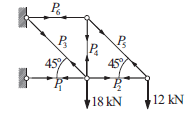


### 2a) Write the linear system for the tensions $P_i$ as equations and in matrix form



In [4]:
import numpy as np

# Define the coefficients of the linear system (matrix A)
# The rows correspond to the force balance equations at each joint.
# The columns correspond to the unknown tensions [P1, P2, P3, P4, P5, P6].

# Constants for 45-degree angles
c = np.cos(np.radians(45))  # cos(45 degrees)
s = np.sin(np.radians(45))  # sin(45 degrees)

A = np.array([
    # Eq 1: Horizontal at 12kN load joint
    [0, 1, 0, 0, c, 0],
    # Eq 2: Vertical at 12kN load joint
    [0, 0, 0, 0, s, 0],
    # Eq 3: Horizontal at 18kN load joint
    [-1, 1, -c, 0, 0, 0],
    # Eq 4: Vertical at 18kN load joint
    [0, 0, s, 1, 0, 0],
    # Eq 5: Horizontal at top-right joint
    [0, 0, 0, 0, -c, -1],
    # Eq 6: Vertical at top-right joint
    [0, 0, 0, -1, s, 0],
    # Eq 7: Horizontal at top-left joint
    [0, 0, c, 0, 0, 1],
    # Eq 8: Vertical at top-left joint
    [0, 0, s, 0, 0, 0]
])

# Define the right-hand side vector (b) representing the external forces
b = np.array([0, 12, 0, 18, 0, 0, 0, 0])

# Solve the overdetermined system using the least-squares method.
x, residuals, rank, s_vals = np.linalg.lstsq(A, b, rcond=None)

# Print the solutions for the tensions, rounded for clarity
print(A)
print("The calculated tensions in the truss members are:")
print(f"P1 = {x[0]:.2f} kN")
print(f"P2 = {x[1]:.2f} kN")
print(f"P3 = {x[2]:.2f} kN")
print(f"P4 = {x[3]:.2f} kN")
print(f"P5 = {x[4]:.2f} kN")
print(f"P6 = {x[5]:.2f} kN")

[[ 0.          1.          0.          0.          0.70710678  0.        ]
 [ 0.          0.          0.          0.          0.70710678  0.        ]
 [-1.          1.         -0.70710678  0.          0.          0.        ]
 [ 0.          0.          0.70710678  1.          0.          0.        ]
 [ 0.          0.          0.          0.         -0.70710678 -1.        ]
 [ 0.          0.          0.         -1.          0.70710678  0.        ]
 [ 0.          0.          0.70710678  0.          0.          1.        ]
 [ 0.          0.          0.70710678  0.          0.          0.        ]]
The calculated tensions in the truss members are:
P1 = -15.00 kN
P2 = -10.50 kN
P3 = 6.36 kN
P4 = 12.00 kN
P5 = 14.85 kN
P6 = -7.50 kN


### 2b) Solve for $P_i$ using LU decomposition and substitution.
{method, answer}

In [5]:
import numpy as np
from scipy.linalg import lu

# Define the coefficients of the linear system (matrix A)
c = np.cos(np.radians(45))
s = np.sin(np.radians(45))

A = np.array([
    [0, 1, 0, 0, c, 0],
    [0, 0, 0, 0, s, 0],
    [-1, 1, -c, 0, 0, 0],
    [0, 0, s, 1, 0, 0],
    [0, 0, 0, 0, -c, -1],
    [0, 0, 0, -1, s, 0],
    [0, 0, c, 0, 0, 1],
    [0, 0, s, 0, 0, 0]
])

# Define the right-hand side vector (b)
b = np.array([0, 12, 0, 18, 0, 0, 0, 0])

# Solve the overdetermined system using the normal equations: A^T A x = A^T b
At = A.T
AtA = At @ A
Atb = At @ b

# Perform LU decomposition on the square matrix AtA
P, L, U = lu(AtA)

# The system to solve is L U x = P (A^T b)
b_prime = P @ Atb

# Step 1: Forward substitution to solve L*y = b_prime
y = np.linalg.solve(L, b_prime)

# Step 2: Backward substitution to solve U*x = y
x = np.linalg.solve(U, y)

# Print the solution
print("The least-squares solution for the tensions P_i is:")
print(f"P1 = {x[0]:.2f} kN")
print(f"P2 = {x[1]:.2f} kN")
print(f"P3 = {x[2]:.2f} kN")
print(f"P4 = {x[3]:.2f} kN")
print(f"P5 = {x[4]:.2f} kN")
print(f"P6 = {x[5]:.2f} kN")

The least-squares solution for the tensions P_i is:
P1 = -15.00 kN
P2 = -10.50 kN
P3 = 6.36 kN
P4 = 12.00 kN
P5 = 14.85 kN
P6 = -7.50 kN


### 2c)  Double the loads (18 kN and 12 kN) and solve for $P_i$ again


*without refactoring*.
{answer}

In [8]:
import numpy as np

# Matrix A: Represents the coefficients of the force balance equations at each joint.
# Each row is an equation. The columns correspond to the unknown forces P1, P2, P3, P4, P5, and P6.
# The constants are for the 45-degree angles.
c = np.cos(np.radians(45))  # cos(45 degrees)
s = np.sin(np.radians(45))  # sin(45 degrees)

# The matrix A is 8x6, representing 8 equations for 6 unknowns.
A = np.array([
    [0, 1, 0, 0, c, 0],
    [0, 0, 0, 0, s, 0],
    [-1, 1, -c, 0, 0, 0],
    [0, 0, s, 1, 0, 0],
    [0, 0, 0, 0, -c, -1],
    [0, 0, 0, -1, s, 0],
    [0, 0, c, 0, 0, 1],
    [0, 0, s, 0, 0, 0]
])

# Vector b: Contains the known external loads and is based on the force balance equations.
# Double the loads of 12 kN and 18 kN
b = np.array([0, 12 * 2, 0, 18 * 2, 0, 0, 0, 0])

# The function `numpy.linalg.lstsq` provides the least-squares solution that minimizes
# the sum of the squared errors, which is the standard approach for this type of system.
x, residuals, rank, s_vals = np.linalg.lstsq(A, b, rcond=None)

# The solution vector x contains the calculated values for P1 through P6.
print("The calculated tensions in the truss members are:")
print(f"P1 = {x[0]:.2f} kN")
print(f"P2 = {x[1]:.2f} kN")
print(f"P3 = {x[2]:.2f} kN")
print(f"P4 = {x[3]:.2f} kN")
print(f"P5 = {x[4]:.2f} kN")
print(f"P6 = {x[5]:.2f} kN")

The calculated tensions in the truss members are:
P1 = -30.00 kN
P2 = -21.00 kN
P3 = 12.73 kN
P4 = 24.00 kN
P5 = 29.70 kN
P6 = -15.00 kN


## Question 3

Consider the matrix:

$$ A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$$

## 3a) Calculate the condition number of A
{answer}

In [4]:
import numpy as np

# Define the matrix A
A = np.array([[1, 2],
              [3, 4]])

# Calculate the condition number
condition_number = np.linalg.cond(A)

print(f"The condition number of A is: {condition_number:.4f}")

The condition number of A is: 14.9330


## 3b) Let's use a preconditioner matrix $P$ to improve the condition number of the product $P^{-1} A$. Give 2 examples of $P$ that improve the condition number.

Can you identify the 'perfect' preconditioner? (Consider the easiest matrix to solve!)
{answer, answer}

In [5]:
import numpy as np
from scipy.linalg import lu_factor, lu_solve

# Define the matrix A
A = np.array([[1, 2],
              [3, 4]])

# 1. Diagonal Preconditioner (Jacobi Preconditioner)
P_diag = np.diag(np.diag(A))
print("Diagonal Preconditioner P:")
print(P_diag)

# Calculate P_diag_inv * A
P_diag_inv_A = np.linalg.inv(P_diag) @ A
print("\nP_diag_inv * A:")
print(P_diag_inv_A)

# Calculate the condition number of P_diag_inv * A
condition_number_diag = np.linalg.cond(P_diag_inv_A)
print(f"\nCondition number with Diagonal Preconditioner: {condition_number_diag:.4f}")

# The 'perfect' preconditioner P = A
P_perfect = A
print("\n'Perfect' Preconditioner P:")
print(P_perfect)

# Calculate P_perfect_inv * A
P_perfect_inv_A = np.linalg.inv(P_perfect) @ A
print("\nP_perfect_inv * A:")
print(P_perfect_inv_A)

# Calculate the condition number of P_perfect_inv * A
condition_number_perfect = np.linalg.cond(P_perfect_inv_A)
print(f"\nCondition number with 'Perfect' Preconditioner: {condition_number_perfect:.4f}")

Diagonal Preconditioner P:
[[1 0]
 [0 4]]

P_diag_inv * A:
[[1.   2.  ]
 [0.75 1.  ]]

Condition number with Diagonal Preconditioner: 13.0484

'Perfect' Preconditioner P:
[[1 2]
 [3 4]]

P_perfect_inv * A:
[[1.00000000e+00 0.00000000e+00]
 [1.11022302e-16 1.00000000e+00]]

Condition number with 'Perfect' Preconditioner: 1.0000
